<a href="https://colab.research.google.com/github/akhii-leesh/Next-word-predictor/blob/main/Final_LSTM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Update your TensorFlow and Keras installation
!pip install --upgrade tensorflow keras numpy

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 31.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1


In [ ]:
corpus = [
    "The sun rises in the east",
    "The sky is clear and blue",
    "Birds are chirping in the morning light",
    "The river flows gently over the rocks",
    "The autumn leaves fall softly to the ground",
    "The snow blankets the trees in winter",
    "Spring brings flowers blooming everywhere",
    "The summer heat warms the earth",
    "The stars twinkle in the night sky",
    "The moonlight dances on the waves",
    "A gentle breeze rustles the leaves",
    "The forest is alive with the sound of nature",
    "The rain nourishes the thirsty soil",
    "The mountain peaks rise high into the clouds",
    "The ocean waves crash against the shore",
    "It was the best of times it was the worst of times",
    "Call me Ishmael",
    "To be or not to be that is the question",
    "I think therefore I am",
    "In the beginning God created the heavens and the earth",
    "The quick brown fox jumps over the lazy dog",
    "All that glitters is not gold",
    "A journey of a thousand miles begins with a single step",
    "To infinity and beyond",
    "Elementary my dear Watson",
    "Et tu Brute",
    "Frankly my dear I don't give a damn",
    "Houston we have a problem",
    "Keep your friends close but your enemies closer",
    "Life is what happens when you're busy making other plans",
    "May the force be with you",
    "Not all those who wander are lost",
    "That's one small step for man one giant leap for mankind",
    "To boldly go where no man has gone before",
    "You talking to me",
    "All the world's a stage and all the men and women merely players",
    "The only thing we have to fear is fear itself",
    "I have a dream that one day this nation will rise up",
    "Four score and seven years ago our fathers brought forth",
    "Ask not what your country can do for you",
    "The pen is mightier than the sword",
    "When in Rome do as the Romans do",
    "Carpe diem seize the day",
    "Knowledge is power",
    "Time and tide wait for no man",
    "To err is human to forgive divine",
    "Actions speak louder than words",
    "The early bird catches the worm",
    "Better late than never",
    "Curiosity killed the cat",
    "Every cloud has a silver lining",
    "When life gives you lemons make lemonade",
    "A picture is worth a thousand words",
    "Beauty is in the eye of the beholder",
    "Brevity is the soul of wit",
    "The greatest glory in living lies not in never falling but in rising every time we fall",
    "The only limit to our realization of tomorrow is our doubts of today",
    "The purpose of our lives is to be happy",
    "Life is short and the world is wide",
    "Happiness is not something ready made it comes from your own actions"
]

In [ ]:
# Updated tokenization process
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)  # corpus should be a pre-processed list of text

total_words = len(tokenizer.word_index) + 1

# Create input sequences
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# Padding sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Splitting data into predictors and label
predictors, label = input_sequences[:, :-1], input_sequences[:, -1]
label = tf.keras.utils.to_categorical(label, num_classes=total_words)

In [ ]:
# Model Definition
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(600, return_sequences=True))
model.add(Dropout(0.2))  # Adding dropout for regularization
model.add(LSTM(400))  # Reducing the LSTM units to prevent overfitting
model.add(Dense(total_words, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Add EarlyStopping
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)

# Model Training
history = model.fit(predictors, label, epochs=100, verbose=1, callbacks=[early_stop])

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.0496 - loss: 5.5259
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0895 - loss: 5.3247
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0832 - loss: 5.1608
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0690 - loss: 5.1901
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0795 - loss: 5.1612
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0732 - loss: 5.1165
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0892 - loss: 5.0061
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0845 - loss: 4.9940
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0928 - loss: 4.9392
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1064 - loss: 4.8421
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0879 - loss: 4.6606
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 

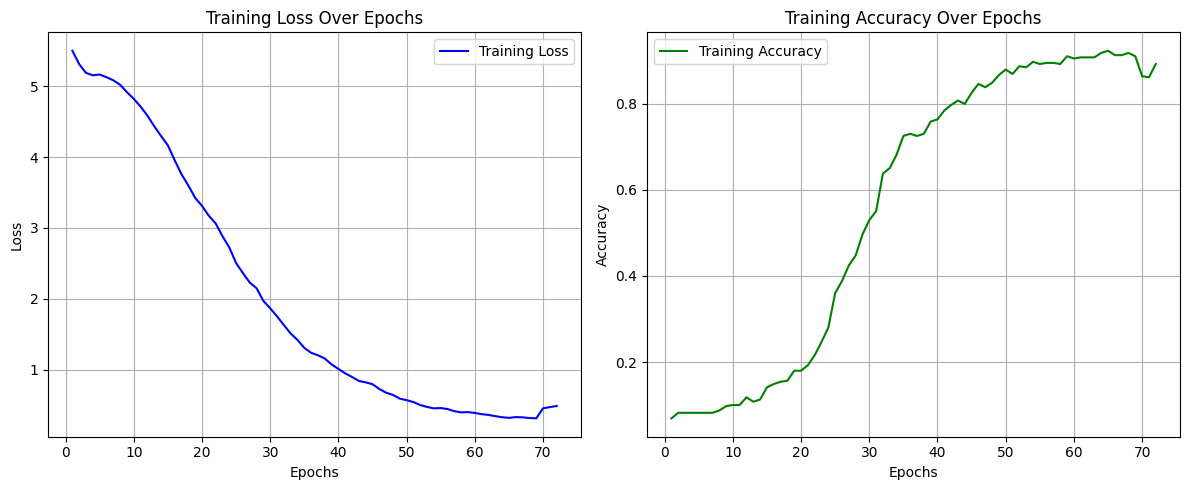

In [ ]:
import matplotlib.pyplot as plt

# Assuming `history` contains the training history with 'loss' and 'accuracy' keys
loss_values = history.history['loss']  # Replace with actual loss values
accuracy_values = history.history['accuracy']  # Replace with actual accuracy values
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 5))

# Plot for loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, label='Training Loss', color='blue')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot for accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy_values, label='Training Accuracy', color='green')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
def generate_text(seed_text, next_words, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        predicted_word_index = np.argmax(predicted, axis=-1)

        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted_word_index:
                output_word = word
                break

        seed_text += " " + output_word
    return seed_text

In [ ]:
# Train the model with a validation split (e.g., 20% of data for validation)
history = model.fit(predictors, label, epochs=100, verbose=1, validation_split=0.2, callbacks=[early_stop])

# Access validation accuracy from the history object
val_accuracy = history.history['val_accuracy'][-1]  # Validation accuracy from the last epoch
print(f"Validation accuracy: {val_accuracy * 100:.2f}%")

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9243 - loss: 0.3537 - val_accuracy: 0.9231 - val_loss: 0.3896
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9254 - loss: 0.3005 - val_accuracy: 0.8974 - val_loss: 0.4183
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9164 - loss: 0.3084 - val_accuracy: 0.8718 - val_loss: 0.4405
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9270 - loss: 0.2990 - val_accuracy: 0.8846 - val_loss: 0.4555
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9269 - loss: 0.2350 - val_accuracy: 0.8974 - val_loss: 0.4678
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9360 - loss: 0.2601 - val_accuracy: 0.8846 - val_loss: 0.4825
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9165 - loss: 0.2701 - val_accuracy: 0.8974 - val_loss: 0.4924
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9160 - loss: 0.2624 - val_accuracy: 0.

In [ ]:
seed_text = "Akhilesh"
next_words = 5
print(generate_text(seed_text, next_words, max_sequence_len))

Akhilesh is diem seize the day
